<a href="https://colab.research.google.com/github/bhattronak1/ML-Tensorflow-project/blob/main/Fish_Market_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses Fish Market Dataset and build a model to predict Fish weight. To do this, we will provide model data with attributes like Species, Length, Height and Width.

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
print("Import Completed")

Import Completed


**GET THE DATA**

First download and import dataset using *pandas*

In [32]:
dataset_path= "https://raw.githubusercontent.com/bhattronak1/ML-Tensorflow-project/main/Fish.csv"
dataset_path

'https://raw.githubusercontent.com/bhattronak1/ML-Tensorflow-project/main/Fish.csv'

In [33]:
dataset = pd.read_csv(dataset_path)
dataset.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [34]:
species= dataset.pop('Species')

In [35]:
dataset['Perch'] = (species=='Perch') * 1.0
dataset['Bream'] = (species=='Bream') * 1.0
dataset['Roach'] = (species=='Roach') * 1.0
dataset['Pike'] = (species=='Pike') * 1.0
dataset['Smelt'] = (species=='Smelt') * 1.0
dataset['Parkki'] = (species=='Parkki') * 1.0
dataset['Whitefish'] = (species=='Whitefish') * 1.0

In [36]:
train_dataset= dataset.sample(frac=0.8, random_state=0)
test_dataset= dataset.drop(train_dataset.index)
train_dataset.tail()

,Weight,Length1,Length2,Length3,Height,Width,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
152,9.9,11.3,11.8,13.1,2.2139,1.1659,0.0,0.0,0.0,0.0,1.0,0.0,0.0
124,1000.0,39.8,43.0,45.2,11.9328,7.2772,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34,950.0,38.0,41.0,46.5,17.6235,6.3705,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28,850.0,32.8,36.0,41.6,16.8896,6.1984,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Inspect the data**

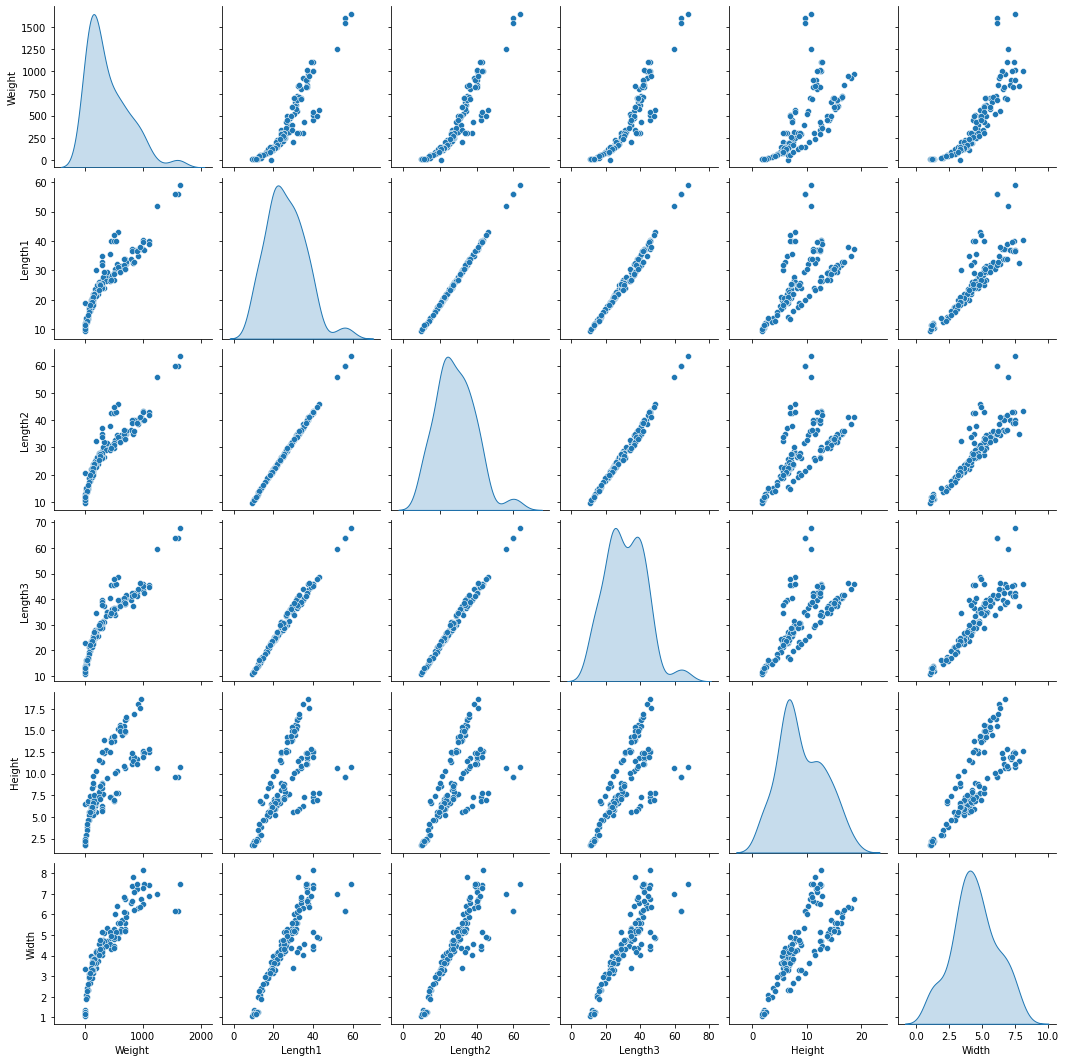

In [37]:
sns.pairplot(train_dataset[['Weight','Length1','Length2','Length3','Height','Width']],diag_kind='kde')

In [38]:
train_stat= train_dataset.describe()
train_stat.pop('Weight')
train_stat= train_stat.transpose()
train_stat

,count,mean,std,min,25%,50%,75%,max
Length1,127.0,26.384252,9.931427,9.3000,19.60000,25.4000,32.25000,59.0000
Length2,127.0,28.556693,10.648329,9.8000,21.40000,27.5000,35.00000,63.4000
Length3,127.0,31.405512,11.498408,10.8000,23.50000,30.1000,39.55000,68.0000
Height,127.0,8.999738,4.138348,1.7284,6.11230,7.7920,12.37930,18.6354
Width,127.0,4.432350,1.670181,1.0476,3.38565,4.3225,5.46225,8.1420
Perch,127.0,0.338583,0.475102,0.0000,0.00000,0.0000,1.00000,1.0000
Bream,127.0,0.228346,0.421429,0.0000,0.00000,0.0000,0.00000,1.0000
Roach,127.0,0.133858,0.341848,0.0000,0.00000,0.0000,0.00000,1.0000
Pike,127.0,0.110236,0.314424,0.0000,0.00000,0.0000,0.00000,1.0000
Smelt,127.0,0.086614,0.282383,0.0000,0.00000,0.0000,0.00000,1.0000


**Split features from labels**

In [39]:
train_label= train_dataset.pop('Weight')
test_label= test_dataset.pop('Weight')

**Normalization**

In [63]:
normalizer=preprocessing.Normalization()

In [64]:
normalizer.adapt(np.array(train_dataset))
first = np.array(train_dataset[:1])
print(first)
print(normalizer(first).numpy())

[[27.6  30.   35.   12.67  4.69  0.    1.    0.    0.    0.    0.    0.  ]]
[[ 0.12289902  0.13607994  0.31384552  0.89040315  0.1548756  -0.7154752
   1.83829    -0.39312264 -0.3519855  -0.3079409  -0.2761724  -0.18033393]]


**Linear Regression**

**One Variable**

In [41]:
Height = np.array(train_dataset['Height'])

Height_normalizer = preprocessing.Normalization(input_shape=[1,])
Height_normalizer.adapt(Height)


**Build sequential model:**

In [42]:
Height_model=tf.keras.Sequential([ 
    Height_normalizer,
    layers.Dense(units=1)                              

])

Height_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_6 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


**This model will predict Fish weight from Fish Height**

In [43]:
Height_model.predict(Height[:10])

array([[ 1.4563975 ],
       [-1.0017622 ],
       [-1.0812036 ],
       [-0.7802628 ],
       [ 0.49869615],
       [ 1.0833956 ],
       [ 1.0957763 ],
       [-1.0758864 ],
       [ 3.823529  ],
       [-1.2230632 ]], dtype=float32)

In [44]:
Height_model.compile( 
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

**Once model is configure, use Model.fit() to the training data**

In [45]:
%%time

history= Height_model.fit( 
    train_dataset['Height'], train_label,
    epochs=1000,
    verbose=0,
    validation_split=0.2)

CPU times: user 1min 14s, sys: 1.15 s, total: 1min 15s
Wall time: 1min 13s


In [46]:
Hist=pd.DataFrame(history.history)
Hist['epoch']=history.epoch
Hist.tail()

,loss,val_loss,epoch
995,166.854111,122.795166,995
996,166.844696,122.785027,996
997,166.830750,122.773407,997
998,166.813568,122.761322,998
999,166.801819,122.751129,999


In [47]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='Val_loss')
  plt.ylim([0,1000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Weight]')
  plt.legend()
  plt.grid(True)

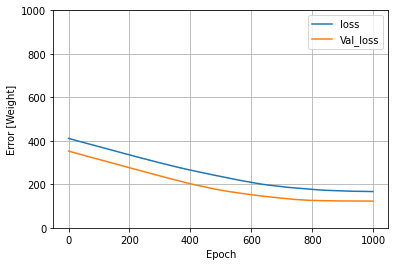

In [48]:
plot_loss(history)

Collect the result on the test set

In [49]:
test_result={}

test_result['Height_model']=Height_model.evaluate( 
    test_dataset['Height'],
    test_label, verbose=0)

In [50]:
x=tf.linspace(0.0, 50, 100)
y=Height_model.predict(x)

In [51]:
def plot_height(x, y):

  plt.scatter(train_dataset['Height'], train_label, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Height')
  plt.ylabel('Weight')
  plt.legend()

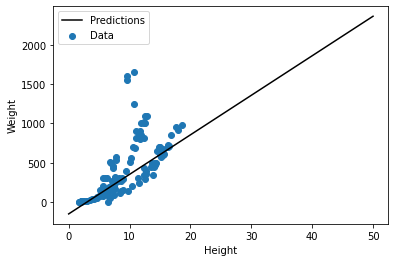

In [52]:
plot_height(x,y)

**A DNN regression**

Build and compile model

In [53]:
def build_and_comple_model(norm):
  model=tf.keras.Sequential([
    norm,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)         
  ])

  model.compile(loss='mean_absolute_error',
                optimizer= tf.keras.optimizers.Adam(0.001))
  
  return model

In [54]:
dnn_Height_model=build_and_comple_model(Height_normalizer)

In [55]:
dnn_Height_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_6 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Train the model:

In [56]:
%%time

history=dnn_Height_model.fit( 
    train_dataset['Height'], train_label,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 8.26 s, sys: 151 ms, total: 8.41 s
Wall time: 8.18 s


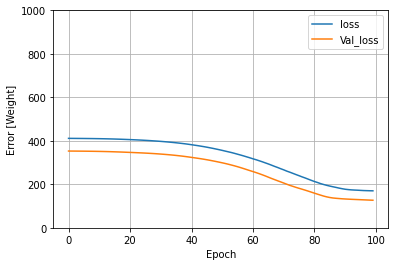

In [57]:
plot_loss(history)

In [58]:
x=tf.linspace(0.0,50,100 )
y=dnn_Height_model.predict(x)

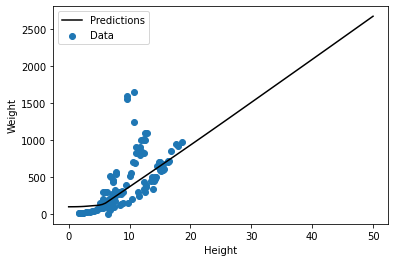

In [59]:
plot_height(x,y)

Collect the results for test set for later

In [60]:
test_result['dnn_Height_model']= dnn_Height_model.evaluate( 
    test_dataset['Height'], test_label,
    verbose=0)

Full Model

In [75]:
normalizer= preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

In [76]:
dnn_model= build_and_comple_model(normalizer)
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_10 (Normalizat (None, 12)                25        
_________________________________________________________________
dense_10 (Dense)             (None, 64)                832       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [77]:
%%time

history=dnn_model.fit( 
    train_dataset, train_label,
    validation_split=0.2, verbose=0, epochs=100)

CPU times: user 8 s, sys: 158 ms, total: 8.16 s
Wall time: 7.91 s


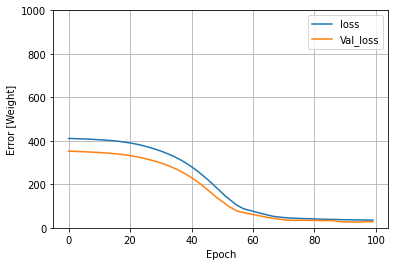

In [78]:
plot_loss(history)

In [79]:
test_result['dnn_model']= dnn_model.evaluate(test_dataset, test_label, verbose=0)

In [ ]:
def norm(x):
  return (x-train_stat['mean'])/train_stat['std']

norm_train_dataset=norm(train_dataset)
norm_test_dataset=norm(test_dataset)

In [ ]:
def build_model():

  model=keras.Sequential([
         layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
         layers.Dense(64, activation=tf.nn.relu),
         layers.Dense(1)        
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])

  return model

In [ ]:
model=build_model()

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS=1000

history=model.fit(norm_train_dataset, train_label, epochs= EPOCHS, validation_split=0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2107.095215,28.092657,2107.095215,2042.395020,33.888126,2042.395020,995
996,2108.748779,28.667667,2108.748779,2141.150879,35.120136,2141.150879,996
997,2210.884521,28.859486,2210.884521,2088.583496,34.935757,2088.583496,997
998,2100.368896,28.340420,2100.368896,2079.704590,34.804153,2079.704590,998
999,2083.390381,28.189754,2083.390381,2091.165039,34.800591,2091.165039,999


In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel(' MAE [Weight]')

  plt.plot(hist['epoch'], hist['mae'], label='Train error')

  plt.plot(hist['epoch'], hist['val_mae'], label=' Val error')

  plt.legend()
  plt.ylim([0,500])

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel(' MSE [Weight]')

  plt.plot(hist['epoch'], hist['mse'], label='Train error')

  plt.plot(hist['epoch'], hist['val_mse'], label=' Val error')

  plt.legend()
  plt.ylim([0,10000])

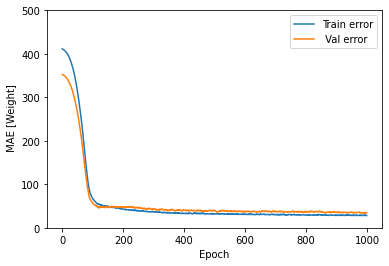

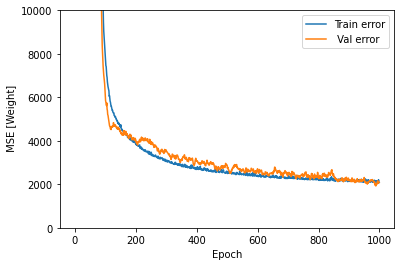

In [ ]:
plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(norm_test_dataset, test_label, verbose=0)
print("Testing set Mean Abs Erros: {:5.2f} Weight".format(mae))

Testing set Mean Abs Erros: 32.02 Weight


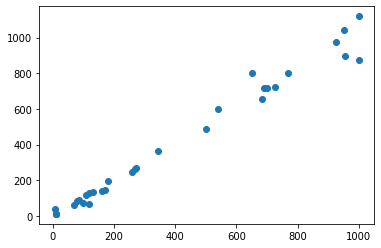

In [ ]:
test_predictions= model.predict(norm_test_dataset).flatten()
plt.scatter(test_label, test_predictions)

(array([ 1.,  0.,  2.,  5., 14.,  5.,  2.,  1.,  1.,  1.]),
 array([-124.40161133,  -96.73242188,  -69.06323242,  -41.39404297,
         -13.72485352,   13.94433594,   41.61352539,   69.28271484,
          96.9519043 ,  124.62109375,  152.2902832 ]),
 <a list of 10 Patch objects>)

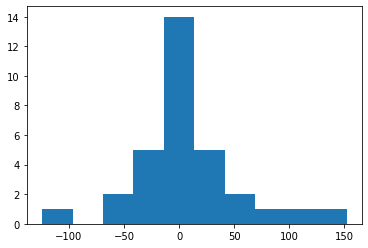

In [ ]:
error= test_predictions - test_label
plt.hist(error)